# Midterm (MACS 30150), February 11, 2019 [20 points total]
### Solutions
### [Hyunwoo]
You will have an hour and fifty minutes to take this exam.
1. Put your name in the space provided above (without the brackets).
2. Download this notebook and accompanying data `MidtermScores.csv`.
3. The class will disconnect their wi-fi and begin taking the exam.
4. The exam is open computer, closed internet, open note.
5. Once you are done, you will signal to a TA or instructor to come over and monitor while you reconnect to the internet and upload your edited notebook to Canvas.

Remember that you must clearly indicate your answers to all questions below. We will give partial credit for partially correct answers. The midterm is worth 20 points (2 problem sets).

# 1. Symbolic and Numerical Derivatives [10 points total]
This exercise will use the following function. In a household savings problem, the marginal utility of consumption is an important function. If a household has a constant relative risk aversion utility function, the marginal utility functional form can be the following:
\begin{equation}
  MU(c_t) \equiv \bigl(c_t\bigr)^{-\sigma}
\end{equation}
where $c_t>0$ is current period consumption and $\sigma\geq 1$ is the coefficient of constant relative risk aversion.

Assume the budget constraint every period is $c_t + b_{t+1} = (1+r_t)b_t + w_t$, where $b_t$ is the initial wealth in period $t$, $b_{t+1}$ is the savings chosen in period $t$ that comes back to the household in period $t+1$ with interest, and $w_t$ is the wage paid on the unit of inelastically supplied labor. Then we can rewrite the marginal utility of consumption above with the budget constraint substituted in.
\begin{equation}
  MU = \Bigl([1 + r_t]b_t + w_t - b_{t+1}\Bigr)^{-\sigma}
\end{equation}


## 1a) Plot the MU(c) function for different consumption values [2 points]
Assume that the coefficient of relative risk aversion is $\sigma = 1.8$. Use Python to plot the marginal utility of consumption for 100 equally spaced consumption values between 0.7 and 5.0. Make sure your plot has an $x$-axis labeled "consumption" and a $y$-axis labeled "marginal utility".

In [138]:
from matplotlib import pyplot as plt
from sympy import *
import sympy as sy
import numpy as np
import math

ct = sy.symbols('ct')
rt = sy.symbols('rt')
bt = sy.symbols('bt')
wt = sy.symbols('wt')
bt1 = sy.symbols('bt1')
Mu = ((1+rt)*bt+wt-bt1)**(-1.8)
print(Mu)
Mu_c = (ct)**(-1.8)
print(Mu_c)

(bt*(rt + 1) - bt1 + wt)**(-1.8)
ct**(-1.8)


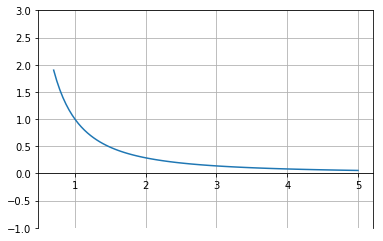

In [139]:
mu_lamb=sy.lambdify(ct,Mu_c,'numpy')
xvals = np.linspace(0.7, 5.0, 100)
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(xvals,mu_lamb(xvals))
plt.ylim(-1,3)
plt.grid()
plt.show()

## 1b) Symbolic numerical derivative [2 points]
Assume the version of the marginal utility above that has the budget constraint substituted in.
\begin{equation}
  MU = \Bigl([1 + r_t]b_t + w_t - b_{t+1}\Bigr)^{-\sigma}
\end{equation}
Use Python's symbolic math package `sympy` to compute the analytical derivative of the marginal utility function with respect to beginning-of-period wealth $b_t$. This will involve you declaring each variable and parameter as a symbol, then specifying the $MU$ funtion to be differentiated. The solution should be a function of all the variables and parameters $(b_t, b_{t+1}, r_t, w_t, \sigma)$. Leave the output in the form that `sympy` produces.

In [140]:
ct = sy.symbols('ct')
rt = sy.symbols('rt')
bt = sy.symbols('bt')
wt = sy.symbols('wt')
bt1 = sy.symbols('bt1')
sig = sy.symbols('sig')
Mu = ((1+rt)*bt+wt-bt1)**(-sig)
print(Mu)
Mu_df = sy.diff(Mu,bt)
print("solution:")
print(Mu_df)

(bt*(rt + 1) - bt1 + wt)**(-sig)
solution:
-sig*(rt + 1)*(bt*(rt + 1) - bt1 + wt)**(-sig)/(bt*(rt + 1) - bt1 + wt)


In [141]:
#practice
mu_lamb=sy.lambdify((bt,bt1),Mu,'numpy')
mu_lamb(1,3)

(rt + wt - 2)**(-sig)

## 1c) Write a function that produces the analytical derivative [3 points]
Write a function that takes five inputs which are the values for the variables and parameters of the marginal utility $(b_t, b_{t+1}, r_t, w_t, \sigma)$ and returns the analytical derivative of the marginal utility (scalar) with respect to beginning-of-period wealth $b_t$ associated with those values. Show your function definition in the cell below. Name your function `dMU_c`. Print out the value of the function for the following three combinations of variables and parameters.

$$ \frac{\partial MU_1}{\partial b_t}:\quad b_t=1.0, \:\: b_{t+1}=0.8, \:\: r_t=0.04, \:\: w_t=1.2, \:\: \sigma=2.2 $$

$$ \frac{\partial MU_2}{\partial b_t}:\quad b_t=5.0, \:\: b_{t+1}=2.1, \:\: r_t=0.01, \:\: w_t=1.8, \:\: \sigma=2.0 $$

$$ \frac{\partial MU_3}{\partial b_t}:\quad b_t=3.3, \:\: b_{t+1}=3.4, \:\: r_t=0.03, \:\: w_t=1.0, \:\: \sigma=1.8 $$

In [142]:
# We can use the derived formula above
# Practive
def dMU_c(bt,bt1,rt,wt,sig):
    return -sig*(rt+1)*(bt*(rt+1)-bt1+wt)**(-sig)/(bt*(rt+1)-bt1+wt)

In [143]:
print(dMU_c(1.0,0.8,0.04,1.2,2.2))
print(dMU_c(5.0,0.2,0.01,1.8,2.0))
print(dMU_c(3.0,3.4,0.03,1.0,1.8))

-0.7123542921746638
-0.006868887975493033
-5.240011929948003


In [149]:
# practive
rt = sy.symbols('rt')
bt = sy.symbols('bt')
wt = sy.symbols('wt')
bt1 = sy.symbols('bt1')
sig = sy.symbols('sig')
Mu = ((1+rt)*bt+wt-bt1)**(-sig)
Mup = Mu.diff(bt)
Mup_np = sy.lambdify((bt,bt1,rt,wt,sig), Mup, 'numpy')
print(Mup_np(1.0,0.8,0.04,1.2,2.2))
print(Mup_np(5.0,0.2,0.01,1.8,2.0))
print(Mup_np(3.0,3.4,0.03,1.0,1.8))

-0.7123542921746638
-0.006868887975493033
-5.240011929948003


In [150]:
# Solution
def dMu_c(bt,bt1,rt,wt,sig):
    rt = sy.symbols('rt')
    bt = sy.symbols('bt')
    wt = sy.symbols('wt')
    bt1 = sy.symbols('bt1')
    sig = sy.symbols('sig')
    Mu = ((1+rt)*bt+wt-bt1)**(-sig)
    Mup = Mu.diff(bt)
    Mup_np = sy.lambdify((bt,bt1,rt,wt,sig), Mup, 'numpy')
    return Mup_np(bt,bt1,rt,wt,sig)

In [151]:
dMu_c(1.0,0.8,0.04,1.2,2.2)

-sig*(rt + 1)*(bt*(rt + 1) - bt1 + wt)**(-sig)/(bt*(rt + 1) - bt1 + wt)

In [152]:
dMu_c(5.0,0.2,0.01,1.8,2.0)

-sig*(rt + 1)*(bt*(rt + 1) - bt1 + wt)**(-sig)/(bt*(rt + 1) - bt1 + wt)

In [153]:
dMu_c(3.0,3.4,0.03,1.0,1.8)

-sig*(rt + 1)*(bt*(rt + 1) - bt1 + wt)**(-sig)/(bt*(rt + 1) - bt1 + wt)

## 1d) Compute the numerical derivative approximation [3 points]
Use the centered second-order finite difference approximation of the derivative to calculate the numerical derivative of the marginal utility function.

$$ f'(x_0)\approx \frac{f(x_0 + h) - f(x_0 - h)}{2h} $$

Recall that our marginal utility function is a function of four variables and the parameter $\sigma$.
\begin{equation}
  MU = \Bigl([1 + r_t]b_t + w_t - b_{t+1}\Bigr)^{-\sigma}
\end{equation}
So we want to approximate the derivative of the marginal utility with respect to beginning-of-period wealth $\partial MU(c)/\partial b_t$ by using the centered second-order finite difference approximation above. A helpful hint on how to do this is the marginal utility function is like $f(x)$ and the derivative is the centered second-order approximation equation.

Define a function named `dMU_c_approx` that takes as inputs the five variables and parameters $(b_t, b_{t+1}, r_t, w_t, \sigma)$ as well as a finite difference amount $h$. Have this function return the centered second-order approximation of the derivative of the marginal utility function with respect to beginning-of-period wealth.

Using your `dMU_c` function from part (c), print the analytical derivative of the marginal utility function with respect to beginning-of-period wealth with the following parameterization.

$$ \frac{\partial MU}{\partial b_t}:\quad b_t=1.0, \:\: b_{t+1}=0.8, \:\: r_t=0.04, \:\: w_t=1.2, \:\: \sigma=2.2 $$

Use your `dMU_c_approx` function to print out the numerical approximation of the derivative for the specification above with the following three finite difference amounts: $h_1 = 0.1$, $h_2= 0.001$ and  $h_3=0.00001$.

In [154]:
x = (bt,bt1,rt,wt,sig)
x
Mu_c = (ct)**(-1.8)
Mu_c_np = sy.lambdify(ct,Mu_c,'numpy')


In [157]:
Mu = ((1+rt)*bt+wt-bt1)**(-sig)
Mu_np = sy.lambdify(bt, Mu, 'numpy')

# Centered second-order finite difference approximation
def dMU_c_approx(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)

print(dMU_c_approx(Mu_c_np,xvals,0.1))
print(dMU_c_approx(Mu_c_np,xvals,0.01))
print(dMU_c_approx(Mu_c_np,xvals,0.00001))



dMu_c(1.0,0.8,0.04,1.2,2.2)

[-5.06850237 -4.26438663 -3.62482761 -3.10930904 -2.68881856 -2.34218627
 -2.05370354 -1.81153761 -1.60665362 -1.43206773 -1.28232071 -1.15310117
 -1.04097203 -0.94316929 -0.85745237 -0.78199136 -0.71528135 -0.65607671
 -0.60334015 -0.55620295 -0.51393372 -0.47591355 -0.44161625 -0.41059249
 -0.38245689 -0.35687765 -0.33356798 -0.31227912 -0.29279453 -0.27492513
 -0.25850528 -0.24338946 -0.22944944 -0.21657194 -0.20465661 -0.19361434
 -0.1833658  -0.17384023 -0.16497435 -0.15671144 -0.1490006  -0.14179602
 -0.1350564  -0.12874446 -0.12282647 -0.11727185 -0.11205286 -0.10714427
 -0.10252312 -0.09816845 -0.09406115 -0.09018372 -0.08652013 -0.0830557
 -0.07977694 -0.07667146 -0.07372783 -0.07093555 -0.06828492 -0.06576697
 -0.06337342 -0.06109662 -0.05892944 -0.05686532 -0.05489812 -0.05302218
 -0.05123221 -0.04952329 -0.04789083 -0.04633058 -0.04483853 -0.04341096
 -0.04204439 -0.04073558 -0.03948145 -0.03827917 -0.03712605 -0.03601958
 -0.0349574  -0.03393729 -0.03295717 -0.03201508 -0.

-sig*(rt + 1)*(bt*(rt + 1) - bt1 + wt)**(-sig)/(bt*(rt + 1) - bt1 + wt)

# 2. Maximum likelihood estimation [10 points total]
This exercise will make use of the `MidtermScores.csv` dataset, which contains 97 observations of students' midterm scores $scores_i$ as well as the number of hours they studied for the midterm $hours_i$ and whether the midterm was within a week of Chinese New Year $ch\_ny_i$.

* `scores`: score of $i$th student on midterm
* `hours`: number of hours that $i$th student studied for the midterm
* `ch_ny`: =1 if the midterm was within a week of Chinese New Year, =0 otherwise

You can load these data into Python as a numpy array using the `np.loadtxt()` command.

In [158]:
import numpy as np
import scipy.stats as sts
import math
import matplotlib.pyplot as plt
data = np.loadtxt('MidtermScores.csv', delimiter=',', skiprows=1)
print('Shape of the data=', data.shape)
scores = data[:, 0]
hours = data[:, 1]
ch_ny = data[:, 2]

Shape of the data= (97, 3)


Assume that our model of student midterm scores is the following linear model.

$$ scores_i = \beta_0 + \beta_1 hours_i + \beta_2 ch\_ny_i + \varepsilon_i \quad\text{where}\quad \varepsilon_i\sim N(0,\sigma) $$

where the error $\varepsilon_i$ are normally distributed with mean 0 and standard deviation $\sigma$.

## 2a) Log likelihood function [3 points]
Define a function named `log_lik` that takes as inputs three data vectors $scores_i$, $hours_i$, $ch\_ny_i$, three coefficient parameters $\beta_0$, $\beta_1$, $\beta_2$, and the standard deviation $\sigma$ of the normally distributed errors and returns the log likelihood (a scalar). Print the log likelihood value for the first 10 data observations given all the coefficients are equal to one $\beta_0, \beta_1, \beta_2=1.0$ and the standard deviation of the errors is equal to $\sigma=0.5$. For the answer to this question, I want to see a function and one scalar log-likelihood value.

In [159]:
data1 = data[1:10]
data1
scores1 = data1[:, 0]
hours1 = data1[:, 1]
ch_ny1 = data1[:, 2]
print(data1)

[[14.27486472 16.33451936  1.        ]
 [12.43908925 13.96817251  1.        ]
 [13.44564122 15.1141107   1.        ]
 [11.80502786 11.90767044  1.        ]
 [11.17552603 12.37565853  1.        ]
 [15.92645829 17.78338874  1.        ]
 [14.49058816 15.52585085  1.        ]
 [15.75878367 13.80274201  0.        ]
 [11.6216479  12.19598896  1.        ]]


In [160]:
def log_lik(xvals, mu, sigma):
    pdf_vals = sts.norm.pdf(xvals, loc = mu, scale = sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

b_0_LR=1
b_1_LR=1
b_2_LR=1
sig_0_LR=0.5

#with variables with first 10 as defined above
res = scores1 - b_0_LR - b_1_LR * hours1 - b_2_LR * ch_ny1

print("The value of the log likelihood function", log_lik(res, 0, sig_0_LR))

The value of the log likelihood function -179.40177468752907


## 2b) Estimate the parameters by MLE [7 points]
Estimate the four parameters $\beta_0, \beta_1, \beta_2, \sigma$ to maximize the log likelihood from part (a). Remember that a minimizer will have to minimize the negative of the log likelihood. Use all 97 observations for this estimation. Use an initial guess of $\beta_0=10.0$, $\beta_1=1.0$, $\beta_2=1.0$, and $\sigma=$ the standard deviation of the $scores_i$ variable. Report your estimated coefficients $\beta_0, \beta_1, \beta_2$ and standard deviation $\sigma$. What is the predicted effect on a midterm score of a student who takes the test around Chineses New Year $ch\_ny_i=1$ versus the score of a student who does not take the test around Chinese New year $ch\_ny_i=0$, other things being equal?

In [161]:
score_var = np.var(scores)
score_var

4.902365049446736

In [162]:
def crit_LR(params, *args):
    
    beta_0, beta_1, beta_2, sigma = params
    scores, hours, ch_ny = args
    n = len(scores)
    sigma2 = sigma * sigma
    xvals = scores - beta_0 - beta_1 * hours - beta_2 * ch_ny
    #log_lik_val= log_lik_truncnorm(xvals, mu, sigma, cut_lb, cut_ub)
    log_lik_val = -n/2*np.log(2*np.pi*sigma2) - 1/(2*sigma2)*(xvals).T @ (xvals)
    neg_log_lik_val = -log_lik_val
                         
    return neg_log_lik_val

def log_lik(xvals, mu, sigma):
    pdf_vals = sts.norm.pdf(xvals, loc = mu, scale = sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

import scipy.optimize as opt
params_init = np.array([10,1,1,score_var])
LR_args = (scores, hours, ch_ny)
result_2 = opt.minimize(crit_LR, params_init, args=LR_args, method = 'BFGS')
b_0_LR, b_1_LR, b_2_LR, sig_0_LR = result_2.x
sig_0_LR = np.absolute(sig_0_LR)

res = scores - b_0_LR - b_1_LR * hours - b_2_LR * ch_ny

h_inv = result_2.hess_inv

#stderr_mu_mle = np.sqrt(vcv_mle[0,0])
#stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print("Parameters are:", b_0_LR, b_1_LR, b_2_LR,sig_0_LR*sig_0_LR)
print("The value of the log likelihood function", log_lik(res, 0, sig_0_LR))
print("The estimated variance covariance matrix is:")
print(result_2.hess_inv)


Parameters are: 4.750441434856798 0.7157362310213088 -1.8909272934124568 0.42608775256366566
The value of the log likelihood function -96.26120579657866
The estimated variance covariance matrix is:
[[ 1.43765831e-01 -8.64548666e-03 -1.32290127e-02  2.35045539e-04]
 [-8.64548666e-03  5.89843061e-04 -2.39443056e-04  6.60059151e-07]
 [-1.32290127e-02 -2.39443056e-04  2.24884802e-02 -1.89289929e-04]
 [ 2.35045539e-04  6.60059151e-07 -1.89289929e-04  2.08120472e-03]]


What is the predicted effect on a midterm score of a student who takes the test around Chineses New Year $ch\_ny_i=1$ versus the score of a student who does not take the test around Chinese New year $ch\_ny_i=0$, other things being equal?

We need to use the calculated betas to do that

In [163]:
ch_ny_1 = sum(b_0_LR + b_1_LR * hours + b_2_LR * 1)/97
ch_ny_0 = sum(b_0_LR + b_1_LR * hours + b_2_LR * 0)/97
print("expected score of the student who takes the test around CNY:",ch_ny_1)
print("expected score of the student who does not take the test around CNY:",ch_ny_0)

expected score of the student who takes the test around CNY: 13.472579258565442
expected score of the student who does not take the test around CNY: 15.363506551977899


Chinese new year = 1 has a less socre on midterm so the negative effect on the midterm as expected!